In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('titanic_toy.csv')

In [5]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [8]:
X = df.drop(columns=['Survived'])
y = df['Survived']

## Missing values with pandas

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [11]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [12]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [13]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()


#ekhane amra X_train er Age and Fare column er mean & median ber kore niyechi karon egula diye amra next time missing value gula fill korbo.

In [14]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)


# Age and fare er null value gula fill kore diyechi.

In [15]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
565,24.0,24.150,2,24.0,24.0,24.150,24.150
246,25.0,7.775,0,25.0,25.0,7.775,7.775
244,30.0,7.225,0,30.0,30.0,7.225,7.225
802,11.0,120.000,3,11.0,11.0,120.000,120.000
577,39.0,55.900,1,39.0,39.0,55.900,55.900


In [16]:
print('Original Age variable variance: ',X_train['Age'].var())
print('Age variance after median imputation: ',X_train['Age_median'].var())
print('Age variance after mean imputation: ',X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())


# mean / median imputation er por basically variance shrink hoy, tobe seta onek beshi shrink hole seta red flug.

Original Age variable variance:  204.3495133904614
Age variance after median imputation:  161.98956633460543
Age variance after mean imputation:  161.81262452718673
Original Fare variable variance:  2448.197913706318
Fare Variance after median imputation:  2340.0910219753637
Fare Variance after mean imputation:  2324.2385256705547


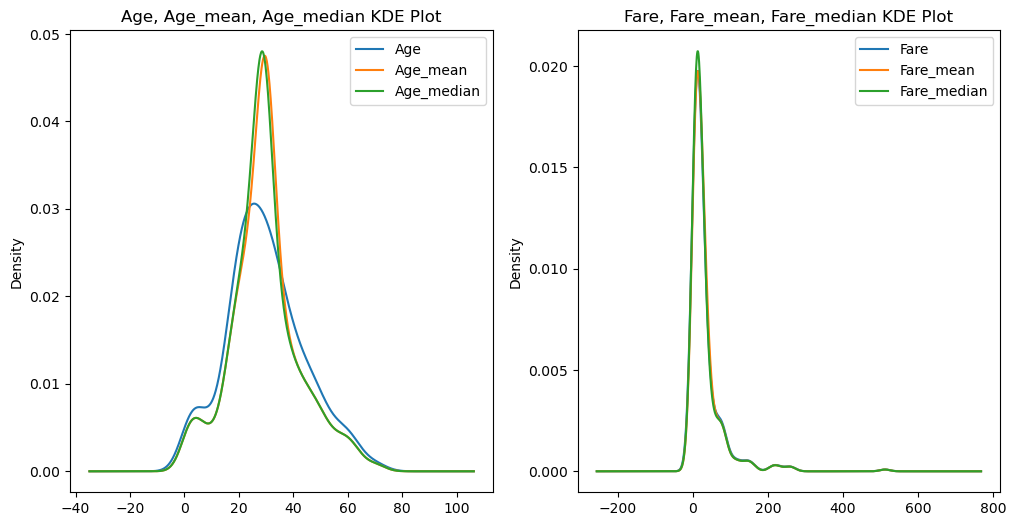

In [17]:
fig, ax= plt.subplots(nrows=1,ncols=2,figsize=(12,6))
# For Age
X_train['Age'].plot(kind='kde',ax=ax[0])
X_train['Age_mean'].plot(kind='kde', ax=ax[0])
X_train['Age_median'].plot(kind='kde',ax=ax[0])

ax[0].set_title("Age, Age_mean, Age_median KDE Plot")
ax[0].legend()


# For Fare
X_train['Fare'].plot(kind='kde',ax=ax[1])
X_train['Fare_mean'].plot(kind='kde',ax=ax[1])
X_train['Fare_median'].plot(kind='kde',ax=ax[1])

ax[1].set_title("Fare, Fare_mean, Fare_median KDE Plot")
ax[1].legend()


plt.show()

```For Age, mean,median এর density অনেক বেড়ে গিয়েছে যেইটা ml model এর জন্য ভালো নয় । কারণ, আমরা ভ্যালু গুলো mean,median দিয়ে পূর্ণ করেছি । ```

```But in the case of fare, we have less NaN value that's why it's kde almost same.```



In [19]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [20]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<Axes: >

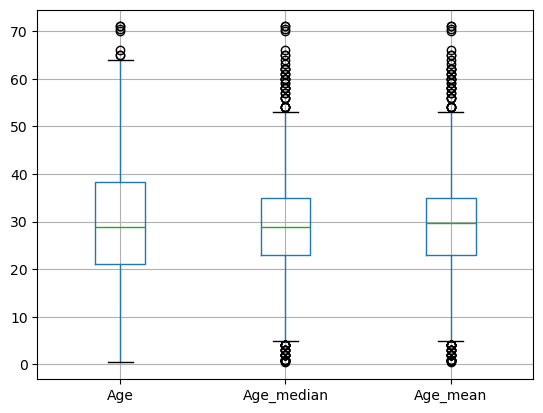

In [21]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

 ```Concution: Age এর ক্ষেত্রে আমাদের  mean,median এর density অনেক বেড়ে গিয়েছে । Outliers অনেক বেড়েছে । covariance co-relation এর পরিবর্তন অনেক বেশি ।কিন্তু,Fare ক্ষেত্রে অনেক কম । আমাদের Age এর ক্ষেত্রে অন্য কোন Imputation technique খুঁজে বের করতে হবে । ```

## Using Sklearn

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [25]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [26]:
trf = ColumnTransformer(
    [
        ('imputer1',imputer1,['Age']),
        ('imputer2',imputer2,['Fare'])
    ]
    ,remainder='passthrough'
)

In [27]:
trf.fit(X_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [28]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [29]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

- `trf.named_transformers_['imputer1'].statistics_`  

এটা মূলত **ColumnTransformer** বা **Pipeline**-এর ভেতর থাকা `imputer1` নামের **SimpleImputer**-এর `statistics_` অ্যাট্রিবিউট।  

যদি `SimpleImputer` ব্যবহার করে **missing values** পূরণ করা হয়, তাহলে `statistics_` বলে দেয় **প্রতিটি কলামের জন্য কী মান বসানো হচ্ছে**।  

যেমন,  

- যদি `strategy='mean'` হয়, তাহলে `statistics_`-এ প্রতিটি কলামের **mean (গড়)** থাকবে।  
- যদি `strategy='median'` হয়, তাহলে **মাঝের মান (median)** থাকবে।  
- যদি `strategy='most_frequent'` হয়, তাহলে **সর্বাধিক পাওয়া (mode) মান** থাকবে।  
- যদি `strategy='constant'` হয়, তাহলে সেট করা **constant value** দেখাবে।  

তুমি চাইলে `trf.named_transformers_['imputer1'].statistics_` প্রিন্ট করে দেখে নিতে পারো, এটা একটা NumPy অ্যারে হবে যেখানে **প্রতিটি কলামের জন্য নির্দিষ্টভাবে কী পূরণ হচ্ছে তা দেখা যাবে**।

In [31]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [58]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])